# **Letter classification algorithm**

## **Introduction**

This is the main program that makes different methods of number classification 

## **Machine Learning Algorithm**

This part contains the ML algorithm with different classifiers, firt there are some functions declarations that are used to manipulate the files in the folder.

In [1]:
import csv
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
def transform_dataset(dataset):
    labels = []
    letters = []
    for row in dataset:
        labels.append(row[-1])
        letters.append(np.array(row[:-1]))
           
    return labels, letters      

In [3]:
def plot_confusion_matrix(data_x, data_y, Ypred):
    classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']
    
    # Computation of confusion matrix on testing set
    cm = confusion_matrix(data_y, Ypred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [4]:
# Model training and accuracy computation for different k values

def tuning_parameter_new_knn(start_value, end_value, N):
    values = [i for i in range(start_value, end_value)]
    accs_train = []
    accs_test  = []

    # Train on the first N train images
    train_x = img_train[:N]
    train_y = label_train[:N]
    
     # Test on the next N/6 test images:
    test_x = img_test[:int(N/6)]
    test_y = label_test[:int(N/6)]

    for i in values:

        predictions_train = []
        predictions_test = []

        predictions_train = kk.kNearestNeighbor(train_x, train_y, train_x, train_y, i)
        accs_train.append(accuracy_score(train_y, predictions_train))

        predictions_test = kk.kNearestNeighbor(train_x, train_y, test_x, test_y, i)
        accs_test.append(accuracy_score(test_y, predictions_test))

    plt.figure(figsize=(16, 8))

    print("Optimal number for k: " + str(values[np.argmax(accs_test)]))

    # Draw accuracies as a function of the depth for both trainin and testing sets
    plt.plot(values, accs_train, label = 'Train Accuracy')
    plt.plot(values, accs_test,  label = 'Test Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of k')
    plt.legend()
    plt.xticks(values)
    plt.show()  

# Loading files

In [5]:
%%time

print("Loading Train dataset...")
train_array = np.load('./../train.npy')
label_train, img_train = transform_dataset(train_array)

print("Loading Test dataset...")
test_array = np.load('./../test.npy')
label_test, img_test = transform_dataset(test_array)

print("Loading Validation dataset...")
validation_array = np.load('./../validation.npy')
label_valdation, img_validation = transform_dataset(validation_array)

print("Finished loading!")

Loading Train dataset...
Loading Test dataset...
Loading Validation dataset...
Finished loading!
CPU times: user 573 ms, sys: 459 ms, total: 1.03 s
Wall time: 1.03 s


# **K-Nearest Neighbors algorithm created**

This section is presented the algorithme developped.

In [6]:
import kk

def new_KNN(N, n_neighbors):
    print("KK neighbors model")
    
    # Train on the first N train images
    train_x = img_train[:N]
    train_y = label_train[:N]
    
     # Test on the next N/6 test images:
    test_x = img_test[:int(N/8)]
    test_y = label_test[:int(N/8)]
       
    #Predict the results of the train dataset
    predicted_train = kk.kNearestNeighbor(train_x, train_y, train_x, train_y, n_neighbors)
    
    #Predict the results of the test dataset
    predicted_test = kk.kNearestNeighbor(train_x, train_y, test_x, test_y, n_neighbors)

    print("The train accuracy is: " + str(accuracy_score(train_y, predicted_train)))
    print("The test accuracy is: " + str(accuracy_score(test_y, predicted_test)))
    
    #Plot confusion matrix for analyse the classification
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plot_confusion_matrix(train_x, train_y, predicted_train)
   
    plt.subplot(122)
    plot_confusion_matrix(test_x, test_y, predicted_test)
    plt.show()

In [15]:
print (len(img_train))
print (len(img_test))
print (len(img_train)/ len(img_test))
print 120000/8

120000
15375
15000


KK neighbors model
The train accuracy is: 0.7775
The test accuracy is: 0.6516516516516516


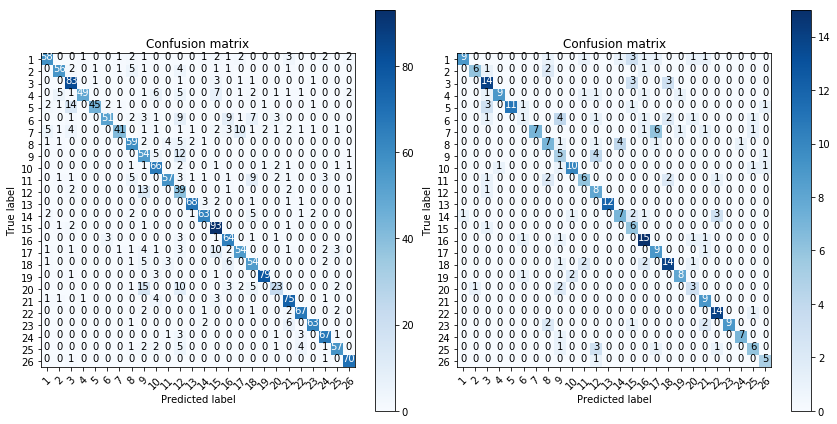

CPU times: user 1min 5s, sys: 1.15 s, total: 1min 6s
Wall time: 1min 4s


In [18]:
%%time 

new_KNN(2000, 5)


Optimal number for k: 1


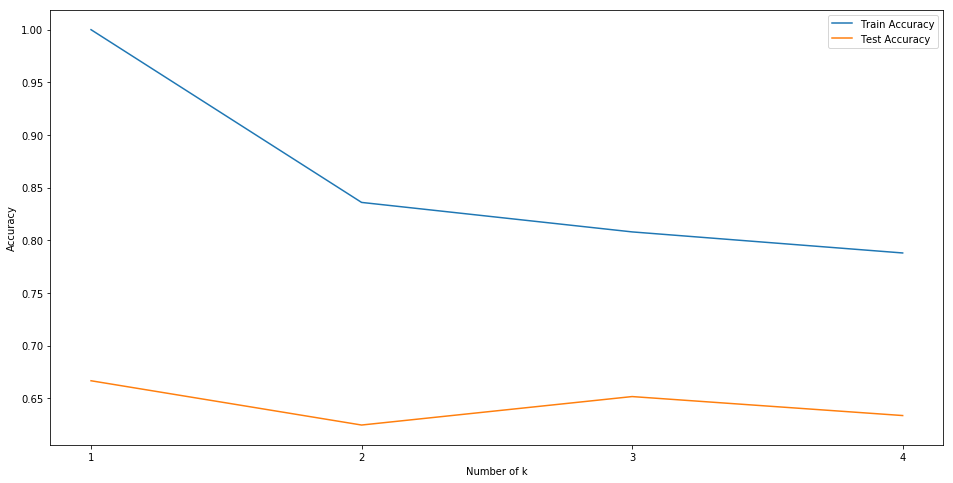

CPU times: user 4min 27s, sys: 292 ms, total: 4min 27s
Wall time: 4min 27s


In [19]:
%%time 

tuning_parameter_new_knn(1, 5, 2000)